In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [98]:
student_data = pd.read_csv('/content/student_performance/clean_data/students_performance_clean_data.csv')

In [111]:
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,0,group C,some college,standard,1,69,90,88,247
2,0,group B,master's degree,standard,0,90,95,93,278
3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,1,88,99,95,282
996,1,group C,high school,free/reduced,0,62,55,55,172
997,0,group C,high school,free/reduced,1,59,71,65,195
998,0,group D,some college,standard,1,68,78,77,223


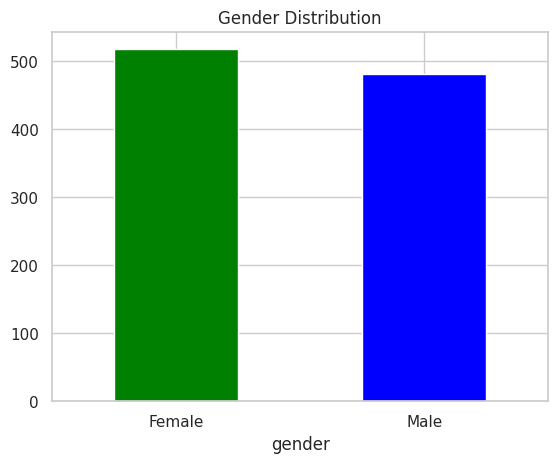

In [112]:
# Let's find the gender distribution among the dataset we gathered.
gender_counts = student_data['gender'].value_counts()

gender_counts.plot(kind='bar', color=['green', 'blue'])
plt.title('Gender Distribution')
plt.xticks(ticks=range(len(gender_counts)), labels=['Female', 'Male'], rotation=0)
plt.savefig('/content/student_performance/results/genderdistribution.png')

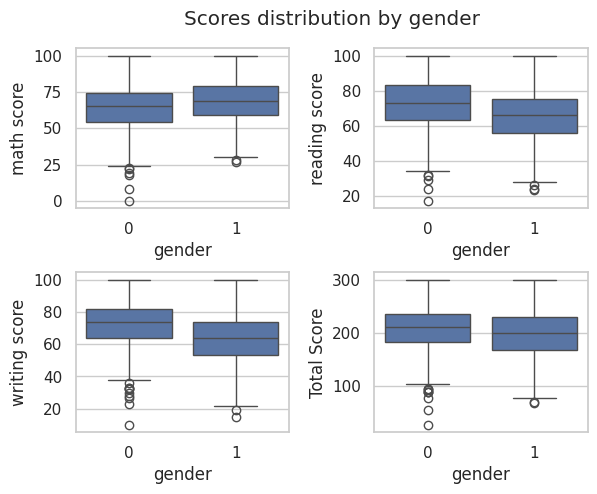

In [120]:
# different scores distribution based on gender
figure, axis = plt.subplots(2, 2)

sns.boxplot(x=student_data['gender'],y=student_data['math score'],ax=axis[0,0])
sns.boxplot(x=student_data['gender'],y=student_data['reading score'],ax=axis[0,1])
sns.boxplot(x=student_data['gender'],y=student_data['writing score'],ax=axis[1,0])
sns.boxplot(x=student_data['gender'],y=student_data['Total Score'],ax=axis[1,1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Scores distribution by gender')
plt.savefig('/content/student_performance/results/scoresdistribution.png')

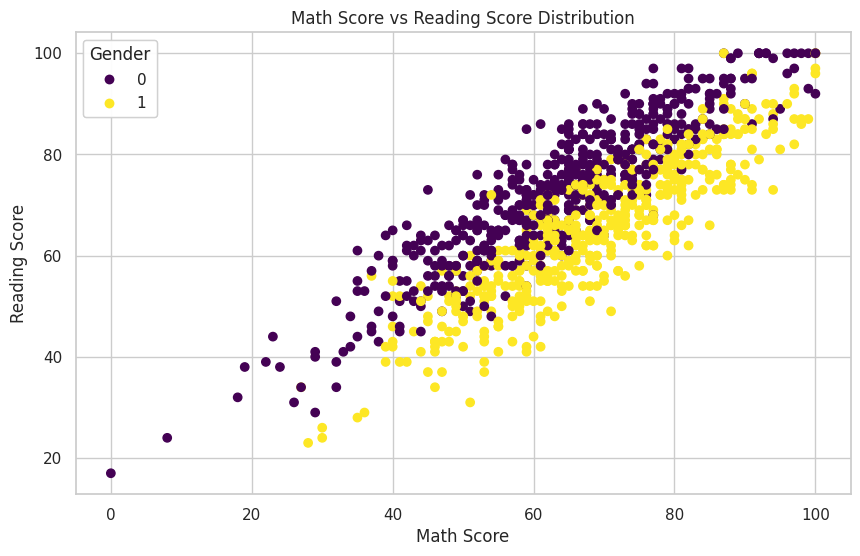

In [114]:
# Create a scatter plot representing the correlation between math score and reading score by gender
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visibility
scatter = plt.scatter(student_data['math score'], student_data['reading score'], c=student_data['gender'], cmap='viridis')

# Create a legend for both genders
legend1 = plt.legend(*scatter.legend_elements(), title='Gender')
plt.gca().add_artist(legend1)

plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs Reading Score Distribution')
plt.grid(True)  # Optional: Add grid for better readability
plt.savefig('/content/student_performance/results/math_vs_reading_distribution.png')
plt.show()  # Optional: Display the plot

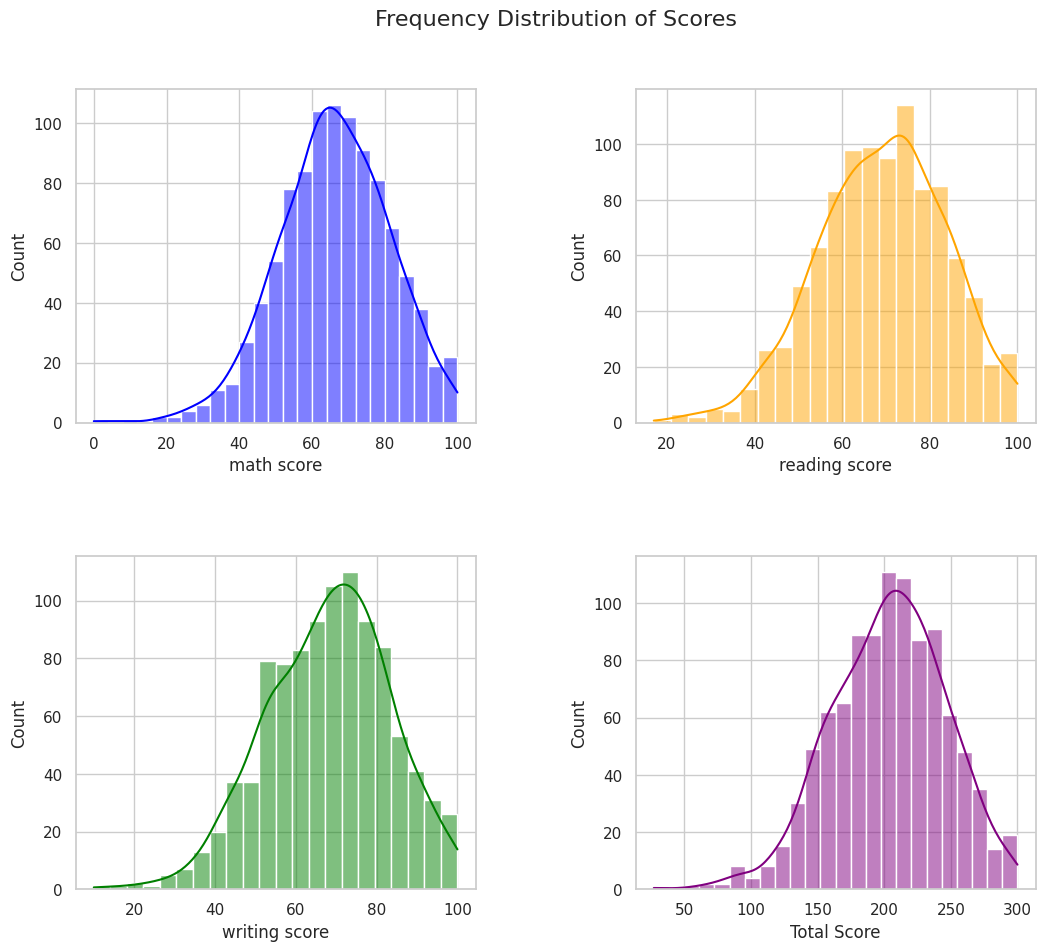

In [115]:
# Create a 2x2 grid for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Set figure size for better visibility

# Plot histograms for each score
sns.histplot(student_data['math score'], ax=axes[0, 0], color='blue', label='Math Score', kde=True)
sns.histplot(student_data['reading score'], ax=axes[0, 1], color='orange', label='Reading Score', kde=True)
sns.histplot(student_data['writing score'], ax=axes[1, 0], color='green', label='Writing Score', kde=True)
sns.histplot(student_data['Total Score'], ax=axes[1, 1], color='purple', label='Total Score', kde=True)

# Adjust layout for better spacing
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Set overall title
plt.suptitle('Frequency Distribution of Scores', fontsize=16)

# Save the figure
plt.savefig('/content/student_performance/results/scores_frequency.png')
plt.show()

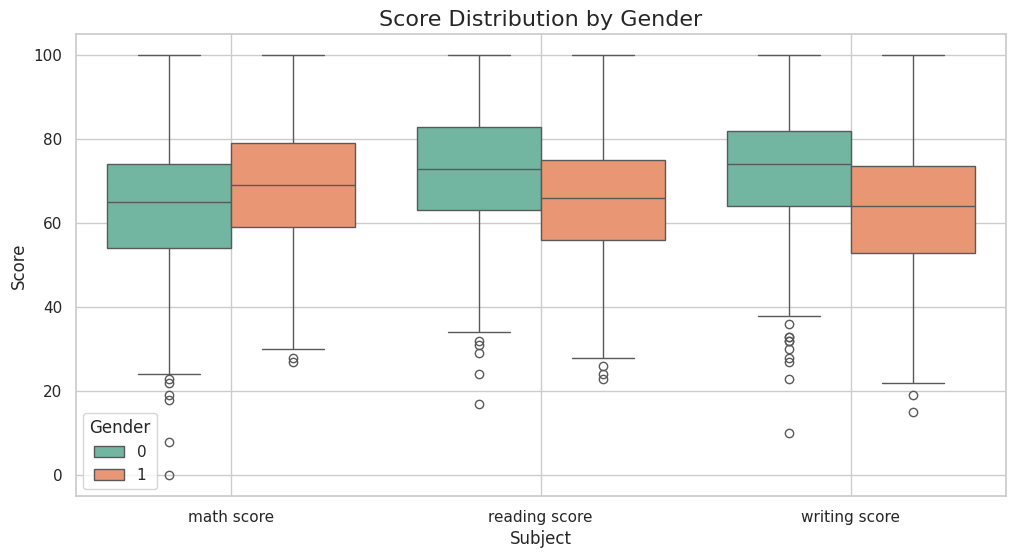

In [118]:
# Melt the DataFrame to long format for easier plotting
melted_data = student_data.melt(id_vars='gender', value_vars=['math score', 'reading score', 'writing score'],
                                 var_name='subject', value_name='score')

# Create a box plot to show score distribution by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='subject', y='score', hue='gender', palette='Set2')

# Set titles and labels
plt.title('Score Distribution by Gender', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)

# Save the figure
plt.savefig('/content/student_performance/results/score_distribution_by_gender.png')
plt.show()